
## Prototype: NSFW Image Detector (Male Genital Shaped Items)
### Machine Learning and Neural Networks (Template 2: Gather your own dataset)

Image Classification using CNN Keras | Full implementation
<br>
Source: https://www.youtube.com/watch?v=J1jhfAw5Uvo

Prototype main objective: able to classify positive or negative images to accuracy above 50%

- Binary classification task

In [1]:
#import libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.utils import shuffle
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

In [2]:
# import datat from CSV, labeled as one or zero
one_data = np.loadtxt('1_output.csv', delimiter = ',')
one_label = np.loadtxt('1_labels.csv', delimiter = ',')
zero_data = np.loadtxt('0_output.csv', delimiter = ',')
zero_label = np.loadtxt('0_labels.csv', delimiter = ',')

In [3]:
# get shape of all np array
print("one_data:", one_data.shape)
print("one_label:", one_label.shape)
print("zero_data:", zero_data.shape)
print("zero_label:", zero_label.shape)

one_data: (1662, 49152)
one_label: (1662,)
zero_data: (1589, 49152)
zero_label: (1589,)


In [4]:
#split label 1 into 70/30 train test split
one_data_70 = one_data[:1108]
one_label_70 = one_label[:1108]
one_data_30 = one_data[1108:]
one_label_30 = one_label[1108:]

#split label 0 into 70/30
zero_data_70 = zero_data[:1059]
zero_label_70 = zero_label[:1059]
zero_data_30 = zero_data[1059:]
zero_label_30 = zero_label[1059:]

In [5]:
zero_data_30.shape

(530, 49152)

In [6]:
#combine arrays of 1 and 0 data and get ready for shuffle
X_train = np.concatenate((one_data_70, zero_data_70))
Y_train = np.concatenate((one_label_70, zero_label_70))

X_test = np.concatenate((one_data_30, zero_data_30))
Y_test = np.concatenate((one_label_30, zero_label_30))

In [7]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)
print("Train label: ", Y_train)
print("Test label: ", Y_test)

X_train: (2167, 49152)
Y_train: (2167,)
X_test: (1084, 49152)
Y_test: (1084,)
Train label:  [1. 1. 1. ... 0. 0. 0.]
Test label:  [1. 1. 1. ... 0. 0. 0.]


In [8]:
#shuffle combined 1 and 0 data
X_train, Y_train = shuffle(X_train, Y_train, random_state=51)
X_test, Y_test = shuffle(X_test, Y_test, random_state=26)
#shuffle again 
X_train, Y_train = shuffle(X_train, Y_train, random_state=13)
X_test, Y_test = shuffle(X_test, Y_test, random_state=22)

In [9]:
print("Shuffled train label: ", Y_train)
print("Shuffled test label: ", Y_test)

Shuffled train label:  [0. 0. 0. ... 0. 1. 1.]
Shuffled test label:  [0. 1. 1. ... 1. 1. 0.]


In [10]:
#reshape into 128 x 128 pixels
X_train = X_train.reshape(len(X_train), 128, 128, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 128, 128, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#rescale to 255
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
print(X_train.shape)
X_train[0]

(2167, 128, 128, 3)


array([[[0.52941176, 0.45098039, 0.43137255],
        [0.53333333, 0.45490196, 0.43529412],
        [0.53333333, 0.45490196, 0.43529412],
        ...,
        [0.80392157, 0.75686275, 0.70588235],
        [0.81568627, 0.76470588, 0.70980392],
        [0.81568627, 0.76078431, 0.71372549]],

       [[0.52941176, 0.45098039, 0.43137255],
        [0.52941176, 0.45882353, 0.42352941],
        [0.52941176, 0.45098039, 0.43137255],
        ...,
        [0.80784314, 0.76078431, 0.71372549],
        [0.81568627, 0.77647059, 0.7372549 ],
        [0.82352941, 0.78039216, 0.73333333]],

       [[0.53333333, 0.44705882, 0.42745098],
        [0.53333333, 0.45098039, 0.42745098],
        [0.5372549 , 0.45098039, 0.43137255],
        ...,
        [0.79607843, 0.75686275, 0.70588235],
        [0.80784314, 0.75686275, 0.70588235],
        [0.78431373, 0.7372549 , 0.68627451]],

       ...,

       [[0.4627451 , 0.42745098, 0.36078431],
        [0.50588235, 0.4627451 , 0.39215686],
        [0.47058824, 0

In [12]:
#print(X_train)

Label:  [0.]


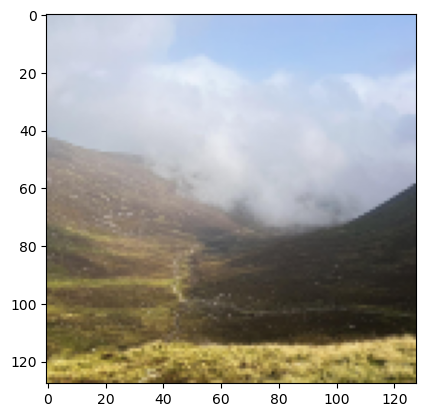

In [16]:
#use matplotlib to plot image and label
idx = random.randint(0, len(X_train))
print("Label: ", Y_train[idx])
plt.imshow(X_train[idx, ...,::-1])
plt.show()

# building model

In [21]:
#build model
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

#optimizers 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 64)               

In [22]:
model.reset_states() 
history = model.fit(X_train, Y_train, epochs = 16, batch_size = 256)

Epoch 1/16

9/9 [==============================] - 6s 492ms/step - loss: 0.6768 - accuracy: 0.5898
Epoch 2/16
9/9 [==============================] - 5s 529ms/step - loss: 0.5220 - accuracy: 0.7508
Epoch 3/16
9/9 [==============================] - 5s 504ms/step - loss: 0.4471 - accuracy: 0.8034
Epoch 4/16
9/9 [==============================] - 4s 479ms/step - loss: 0.3826 - accuracy: 0.8320
Epoch 5/16
9/9 [==============================] - 4s 483ms/step - loss: 0.3336 - accuracy: 0.8546
Epoch 6/16
9/9 [==============================] - 5s 516ms/step - loss: 0.3347 - accuracy: 0.8620
Epoch 7/16
9/9 [==============================] - 5s 504ms/step - loss: 0.3486 - accuracy: 0.8509
Epoch 8/16
9/9 [==============================] - 4s 476ms/step - loss: 0.3219 - accuracy: 0.8583
Epoch 9/16
9/9 [==============================] - 4s 491ms/step - loss: 0.2876 - accuracy: 0.8823
Epoch 10/16
9/9 [==============================] - 5s 514ms/step - loss: 0.2876 - accuracy: 0.8796
Epoch 11/16
9/9 [=

In [23]:
results = model.evaluate(X_test, Y_test)

34/34 [==============================] - 1s 20ms/step - loss: 0.3995 - accuracy: 0.8506


In [24]:
#get history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

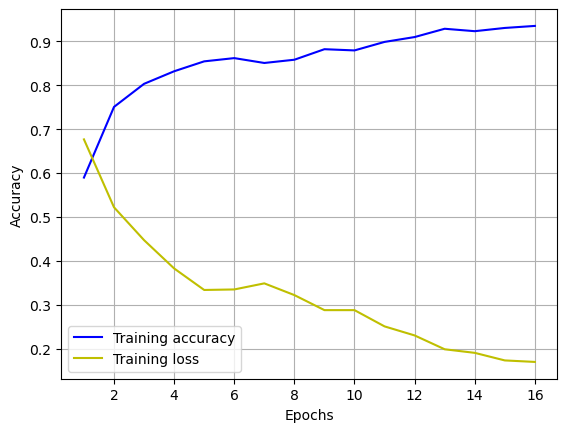

In [25]:
# Let's plot training and validation accuracy as well as loss.
def plot_history(history):
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
plot_history(history)

34/34 [==============================] - 1s 20ms/step


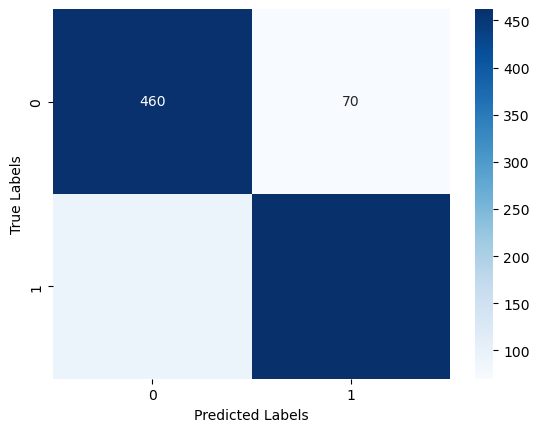

In [30]:
#confusion matrix
y_pred = (model.predict(X_test)[:, 0] > 0.5).astype("int32")
conf_matrix = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)
#SNS heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Make predictions

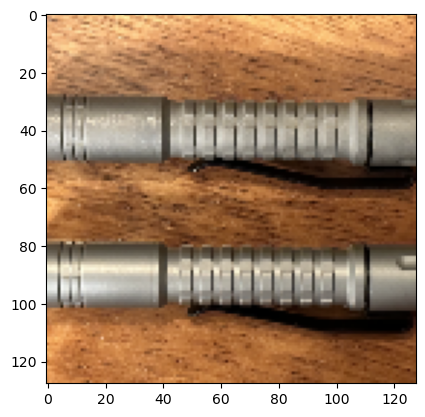

1/1 [==============================] - 0s 24ms/step
Our model says it is a : NOT dick pick


In [29]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, ...,::-1])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 128, 128, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'NOT dick pick'
else:
    pred = 'dick pic!'
    
print("Our model says it is a :", pred)